# Load Data

 ## import csv files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [12]:
metadata = pd.read_csv("../dataset/HAM10000_metadata.csv")
tw_8_L = pd.read_csv("../dataset/hmnist_28_28_L.csv", nrows=1000)
tw_8_RGB = pd.read_csv("../dataset/hmnist_28_28_RGB.csv", nrows=1000)
eight_L = pd.read_csv("../dataset/hmnist_8_8_L.csv", nrows=1000)
eight_RGB = pd.read_csv("../dataset/hmnist_8_8_RGB.csv", nrows=1000)


In [13]:
metadata.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [38]:
metadata.localization.value_counts()

back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: localization, dtype: int64

In [14]:
print(tw_8_L.shape, tw_8_RGB.shape, eight_L.shape, eight_RGB.shape)

(1000, 785) (1000, 2353) (1000, 65) (1000, 193)


In [15]:
test = tw_8_L.drop(columns='label').iloc[0, :]
test_2 = test.values.reshape((28, 28))

In [16]:
col_test = tw_8_RGB.drop(columns='label').iloc[0, :]
col_test = col_test.values.reshape((28, 28, 3))

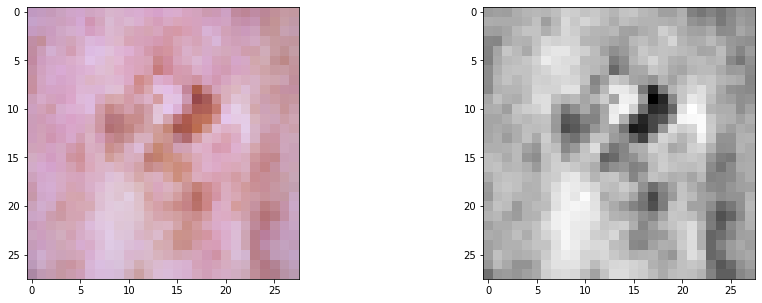

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(col_test)
ax[1].imshow(test_2, cmap='gray')

##  import jpg files

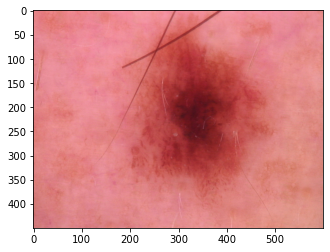

In [18]:
colourImg = Image.open("../dataset/HAM10000_images_part_1/ISIC_0024306.jpg")
colourPixels = colourImg.convert("RGB")
colourArray = np.array(colourPixels.getdata())
test_pic = colourArray.reshape((450, 600, 3))
plt.imshow(test_pic)

**Insights:**
- Use high-res jpg images (450x600 pixels)
- loop through metadata df using image_id to import jpg and convert to 3D numpy array?


In [19]:
jpg_ids = metadata['image_id']
print(f"eg: {jpg_ids[0]}")

eg: ISIC_0027419


In [20]:
jpg_arrays_1 = []

for img in jpg_ids:
    if int(img[8:]) <= 29305:
        colourImg = Image.open(f"../dataset/HAM10000_images_part_1/{img}.jpg")
        colourPixels = colourImg.convert("RGB")
        colourArray = np.array(colourPixels.getdata())
        jpg_arrays_1.append(colourArray)


FileNotFoundError: [Errno 2] No such file or directory: '../dataset/HAM10000_images_part_1/ISIC_0031633.jpg'

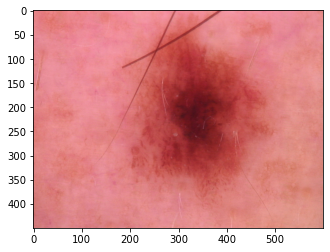

In [21]:
colourImg = Image.open("../dataset/HAM10000_images_part_1/ISIC_0024306.jpg")
colourPixels = colourImg.convert("RGB")
colourArray = np.array(colourPixels.getdata())
test_pic = colourArray.reshape((450, 600, 3))
plt.imshow(test_pic)

# Clean Data

## remove null values

In [22]:
metadata.shape

(10015, 7)

In [23]:
metadata.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [24]:
# drop rows with missing values 
data_cleaned = metadata.dropna()

In [25]:
print(data_cleaned.isna().sum(), data_cleaned.shape)

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64 (9958, 7)


## duplicate analysis


In [26]:
metadata.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

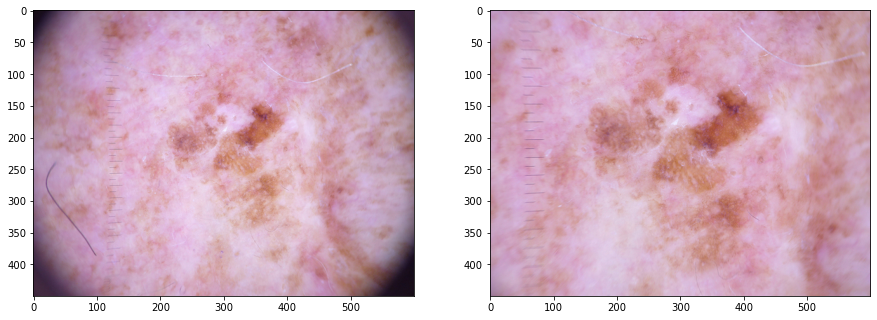

In [27]:
# example of 2 images of same lesion

colourImg = Image.open("../dataset/HAM10000_images_part_1/ISIC_0025030.jpg")
colourPixels = colourImg.convert("RGB")
colourArray = np.array(colourPixels.getdata())
test_pic = colourArray.reshape((450, 600, 3))

colourImg2 = Image.open("../dataset/HAM10000_images_part_1/ISIC_0027419.jpg")
colourPixels2 = colourImg2.convert("RGB")
colourArray2 = np.array(colourPixels2.getdata())
test_pic2 = colourArray2.reshape((450, 600, 3))

fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].imshow(test_pic)
ax[1].imshow(test_pic2)


In [28]:
# Count number of images per lesion_id 

repetition_counts = data_cleaned.groupby('lesion_id').agg({'image_id': 'count', 'dx_type': 'count', 'age': 'mean', 'sex': 'count', 'localization': 'count', 'dx': 'first', }).reset_index()
repetition_counts.columns = ['lesion_id', 'image_count', 'count_dx_type', 'mean_age', 'count_sex', 'count_location', 'dx']

repetition_counts.head()

,lesion_id,image_count,count_dx_type,mean_age,count_sex,count_location,dx
0,HAM_0000000,2,2,60.0,2,2,nv
1,HAM_0000001,1,1,70.0,1,1,bkl
2,HAM_0000002,3,3,65.0,3,3,mel
3,HAM_0000003,1,1,55.0,1,1,nv
4,HAM_0000004,1,1,40.0,1,1,nv


(array([5.467e+03, 0.000e+00, 1.418e+03, 0.000e+00, 4.900e+02, 0.000e+00,
        3.400e+01, 0.000e+00, 5.000e+00, 4.000e+00]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

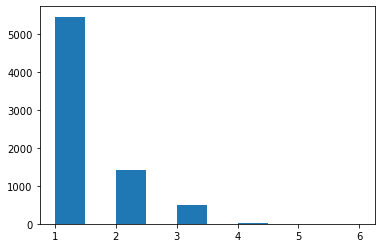

In [36]:
# plot distribution of image counts

plt.hist(repetition_counts.image_count)

In [32]:
# plot distribution of image counts by label

chart = repetition_counts[['image_count', 'dx', 'lesion_id']]
chart.head()

,image_count,dx,lesion_id
0,2,nv,HAM_0000000
1,1,bkl,HAM_0000001
2,3,mel,HAM_0000002
3,1,nv,HAM_0000003
4,1,nv,HAM_0000004


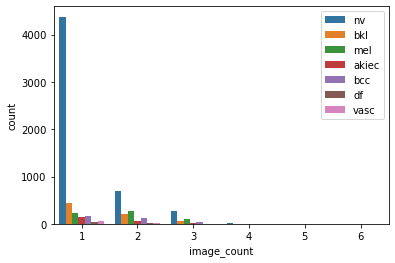

In [34]:
sns.countplot(x="image_count", hue="dx", data=chart)
plt.legend(loc='upper right')

### Solutions

- keep all images (is this any different from data augmentation?! Or does it introduce overfitting?)
- take one image for each lesion_id (removes lesion duplication - 2540 images)
- use augmentation to balance duplication AND solve class imbalances simultaneously?
    - make new df of all non-duplicated lesions and augment these?
    - each lesion then represented same number of times
    - then undersample overrepresented y classes to yield augmented but balanced dataset?

In [35]:
# take one image for each lesion then augment

no_duplicates = data_cleaned.drop_duplicates(subset=['lesion_id'])
no_duplicates.shape

(7418, 7)

# Function to split met/im data

In [2]:
450 * 600 * 3

810000

In [2]:
import random
import numpy as np
import pandas as pd

image_list1 = np.round(np.random.uniform(0, 1, size=810000).tolist(), 2)
image_list2 = np.round(np.random.uniform(0, 1, size=810000).tolist(), 2)
image_list3 = np.round(np.random.uniform(0, 1, size=810000).tolist(), 2)
image_list4 = np.round(np.random.uniform(0, 1, size=810000).tolist(), 2)
image_list5 = np.round(np.random.uniform(0, 1, size=810000).tolist(), 2)


In [3]:
df = pd.DataFrame(
{"test_df" : ["no", "meaning", "to", "this", "column"],
 "pixel_data" : [image_list1, image_list2, image_list3, image_list4, image_list5]},
index = [1, 2, 3, 4, 5])

In [4]:
df

,test_df,pixel_data
1,no,"[0.33, 0.97, 0.44, 0.76, 0.32, 0.26, 0.74, 0.4..."
2,meaning,"[0.91, 0.28, 0.96, 0.67, 0.55, 0.64, 0.8, 0.21..."
3,to,"[0.01, 1.0, 0.57, 0.05, 0.53, 0.93, 0.98, 0.64..."
4,this,"[0.66, 0.85, 0.2, 0.64, 0.65, 0.67, 0.33, 0.12..."
5,column,"[0.64, 0.65, 0.15, 0.96, 0.52, 0.55, 0.55, 0.1..."


In [5]:
len(df)

5

In [17]:
met = df['test_df']
met

In [41]:
# code to extract pixels as 4D array from column

reshape_im = np.array([i.reshape(450, 600, 3) for i in df['pixel_data'].values])
reshape_im

array([[[[0.8 , 0.31, 0.19],
         [0.72, 0.32, 0.44],
         [0.02, 0.17, 0.66],
         ...,
         [0.91, 0.73, 0.51],
         [0.69, 0.73, 0.18],
         [0.12, 0.36, 0.4 ]],

        [[0.76, 0.24, 0.79],
         [0.34, 0.95, 0.82],
         [0.93, 0.27, 0.17],
         ...,
         [0.76, 0.8 , 0.57],
         [0.09, 0.83, 0.22],
         [0.18, 0.11, 0.02]],

        [[0.99, 0.8 , 0.61],
         [0.06, 0.22, 0.91],
         [0.55, 0.62, 0.89],
         ...,
         [0.71, 0.73, 0.37],
         [0.71, 0.02, 0.53],
         [0.09, 0.17, 0.33]],

        ...,

        [[0.2 , 0.31, 0.  ],
         [0.37, 0.8 , 0.41],
         [0.54, 0.76, 0.57],
         ...,
         [0.4 , 0.87, 0.2 ],
         [0.59, 0.83, 0.18],
         [0.46, 0.72, 0.45]],

        [[0.28, 0.51, 0.17],
         [0.25, 0.39, 0.18],
         [0.67, 0.53, 0.36],
         ...,
         [0.26, 0.57, 0.19],
         [0.55, 0.99, 0.98],
         [0.51, 0.13, 0.63]],

        [[0.59, 0.54, 0.38],
       

In [42]:
reshape_im.shape

(5, 450, 600, 3)

# APP ROBUST SCALING AGE


In [3]:
metadata = pd.read_csv("../dataset/HAM10000_metadata.csv")

In [4]:
metadata

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
5,HAM_0001466,ISIC_0027850,bkl,histo,75.0,male,ear
6,HAM_0002761,ISIC_0029176,bkl,histo,60.0,male,face
7,HAM_0002761,ISIC_0029068,bkl,histo,60.0,male,face
8,HAM_0005132,ISIC_0025837,bkl,histo,70.0,female,back
9,HAM_0005132,ISIC_0025209,bkl,histo,70.0,female,back
